In [103]:
import pandas as pd

In [104]:
df = pd.read_csv("C:/Users/Lenovo/Downloads/stanleys_data.csv", encoding="latin1")

In [107]:
df=df.drop(columns=["MOBILE_NUMBER"])

In [108]:
df.head()

,ï»¿CUSTOMER_NAME,ADDRESS,CHECK _IN_DATE,CHECK_OUT_DATE,TOTAL_NIGHTS,ROOM_NO,NO_OF_GUEST,PRICE,TOTAL_AMOUNT,ADVANCE_PAYMENT,REST_PAYMENT,COLLECTED,INVOICE_NUMBER,BOOKING_STATUS,CHECK_OUT,INFO
0,LITTY JOSE,THALASSERY,28-Jul-25,29-Jul-25,1.0,9.0,2.0,3750.0,3750,500,0.0,3250,343/2025,YES,CHECK OUT,3750/DAY
1,ELDHOSE YACOB,NELLIKUZHI,19-Jul-25,21-Jul-25,2.0,8.0,2.0,2770.0,5540,2770,0.0,2770,344/2025,YES,CHECK OUT,2770 PER DAY
2,JANCY,TRIVANDRUM,03-Aug-25,04-Aug-25,1.0,8.0,4.0,2800.0,2800,2800,0.0,NaN,345/2025,YES,CHECK OUT,2500+GST
3,YASHESH PATEL,NaN,21-Jul-25,23-Jul-25,2.0,8.0,3.0,2800.0,5600,2800,NaN,2500,346/2025,YES,CHECK OUT,2800 per day
4,c/o sud Dr. Jeffrey,NaN,26-Jul-25,28-Jul-25,2.0,5.0,2.0,2500.0,5000,5000,0.0,NaN,347/2025,YES,CHECK OUT,NaN


In [109]:
df.tail()

,ï»¿CUSTOMER_NAME,ADDRESS,CHECK _IN_DATE,CHECK_OUT_DATE,TOTAL_NIGHTS,ROOM_NO,NO_OF_GUEST,PRICE,TOTAL_AMOUNT,ADVANCE_PAYMENT,REST_PAYMENT,COLLECTED,INVOICE_NUMBER,BOOKING_STATUS,CHECK_OUT,INFO
384,SATYAM SHIHORA,NaN,22-Jan-26,28-Jan-26,6.0,2.0,3.0,3300.0,19800,5000,14800.0,NaN,NaN,NaN,NaN,NaN
385,RENJITH,TAMILNADU,22-Jan-26,26-Jan-26,1.0,6.0,2.0,2200.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
386,ROBY MATHAI,NaN,05-Jan-26,07-Jan-26,2.0,4.0,2.0,2200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
387,SULTAN,KOLLAM,20-Jan-26,21-Jan-26,1.0,2.0,4.0,3500.0,3500,3500,0.0,NaN,NaN,NaN,CHECK OUT,NaN
388,DR SAFA,NaN,22-Jan-26,23-Jan-26,1.0,9.0,2.0,2500.0,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
df.columns

Index(['ï»¿CUSTOMER_NAME', 'ADDRESS', 'CHECK _IN_DATE', 'CHECK_OUT_DATE',
       'TOTAL_NIGHTS', 'ROOM_NO', 'NO_OF_GUEST', 'PRICE', 'TOTAL_AMOUNT',
       'ADVANCE_PAYMENT', 'REST_PAYMENT', 'COLLECTED', 'INVOICE_NUMBER',
       'BOOKING_STATUS', 'CHECK_OUT', 'INFO'],
      dtype='object')

In [111]:
df.columns=[col.strip().lower().replace(" ","_")for col in df.columns]

In [112]:
df.columns

Index(['ï»¿customer_name', 'address', 'check__in_date', 'check_out_date',
       'total_nights', 'room_no', 'no_of_guest', 'price', 'total_amount',
       'advance_payment', 'rest_payment', 'collected', 'invoice_number',
       'booking_status', 'check_out', 'info'],
      dtype='object')

In [113]:
df['check__in_date'] = pd.to_datetime(df['check__in_date'], errors='coerce')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13896\347628367.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['check__in_date'] = pd.to_datetime(df['check__in_date'], errors='coerce')


In [114]:
numeric_cols=['price','total_amount','advance_payment','rest_payment','no_of_guest']

In [115]:
df[numeric_cols]=df[numeric_cols]=df[numeric_cols].apply(pd.to_numeric,errors='coerce')

In [116]:
df['total_amount']=df['total_amount'].fillna(0)
df['advance_payment']=df['advance_payment'].fillna(0)
df['no_of_guest']=df['no_of_guest'].fillna(1)

In [117]:
critical_cols=['check__in_date','check_out_date','price']
df_clean=df.dropna(subset=critical_cols)
print("Original rows: ",len(df))
print("Cleaned rows: ",len(df_clean))

Original rows:  389
Cleaned rows:  373


In [118]:
df['collected']=pd.to_numeric(df['collected'],errors='coerce')
df['total_amount']=pd.to_numeric(df['total_amount'],errors='coerce')
df['room_no']=pd.to_numeric(df['room_no'],errors='coerce')

In [119]:
df['check_out_date'] = pd.to_datetime(df['check_out_date'], errors='coerce')
df['check__in_date'] = pd.to_datetime(df['check__in_date'], errors='coerce')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13896\804039580.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['check_out_date'] = pd.to_datetime(df['check_out_date'], errors='coerce')


In [120]:
df['stay_duration']=(df['check_out_date']-df['check__in_date']).dt.days

In [121]:
df.head()

,ï»¿customer_name,address,check__in_date,check_out_date,total_nights,room_no,no_of_guest,price,total_amount,advance_payment,rest_payment,collected,invoice_number,booking_status,check_out,info,stay_duration
0,LITTY JOSE,THALASSERY,2025-07-28,2025-07-29,1.0,9.0,2.0,3750.0,3750.0,500.0,0.0,3250.0,343/2025,YES,CHECK OUT,3750/DAY,1.0
1,ELDHOSE YACOB,NELLIKUZHI,2025-07-19,2025-07-21,2.0,8.0,2.0,2770.0,5540.0,2770.0,0.0,2770.0,344/2025,YES,CHECK OUT,2770 PER DAY,2.0
2,JANCY,TRIVANDRUM,2025-08-03,2025-08-04,1.0,8.0,4.0,2800.0,2800.0,2800.0,0.0,NaN,345/2025,YES,CHECK OUT,2500+GST,1.0
3,YASHESH PATEL,NaN,2025-07-21,2025-07-23,2.0,8.0,3.0,2800.0,5600.0,2800.0,NaN,2500.0,346/2025,YES,CHECK OUT,2800 per day,2.0
4,c/o sud Dr. Jeffrey,NaN,2025-07-26,2025-07-28,2.0,5.0,2.0,2500.0,5000.0,5000.0,0.0,NaN,347/2025,YES,CHECK OUT,NaN,2.0


In [122]:
df=df.rename(columns={"ï»¿customer_name":"customer_name"})

In [123]:
df=df.drop_duplicates(subset=['invoice_number'])
df=df.drop_duplicates(subset=['customer_name','check__in_date'])

In [124]:
df.head()

,customer_name,address,check__in_date,check_out_date,total_nights,room_no,no_of_guest,price,total_amount,advance_payment,rest_payment,collected,invoice_number,booking_status,check_out,info,stay_duration
0,LITTY JOSE,THALASSERY,2025-07-28,2025-07-29,1.0,9.0,2.0,3750.0,3750.0,500.0,0.0,3250.0,343/2025,YES,CHECK OUT,3750/DAY,1.0
1,ELDHOSE YACOB,NELLIKUZHI,2025-07-19,2025-07-21,2.0,8.0,2.0,2770.0,5540.0,2770.0,0.0,2770.0,344/2025,YES,CHECK OUT,2770 PER DAY,2.0
2,JANCY,TRIVANDRUM,2025-08-03,2025-08-04,1.0,8.0,4.0,2800.0,2800.0,2800.0,0.0,NaN,345/2025,YES,CHECK OUT,2500+GST,1.0
3,YASHESH PATEL,NaN,2025-07-21,2025-07-23,2.0,8.0,3.0,2800.0,5600.0,2800.0,NaN,2500.0,346/2025,YES,CHECK OUT,2800 per day,2.0
4,c/o sud Dr. Jeffrey,NaN,2025-07-26,2025-07-28,2.0,5.0,2.0,2500.0,5000.0,5000.0,0.0,NaN,347/2025,YES,CHECK OUT,NaN,2.0


In [125]:
df.columns

Index(['customer_name', 'address', 'check__in_date', 'check_out_date',
       'total_nights', 'room_no', 'no_of_guest', 'price', 'total_amount',
       'advance_payment', 'rest_payment', 'collected', 'invoice_number',
       'booking_status', 'check_out', 'info', 'stay_duration'],
      dtype='object')

In [126]:
df['collected']=df['collected'].fillna("unknown")

In [127]:
df.isnull().any()

customer_name      False
address             True
check__in_date      True
check_out_date      True
total_nights        True
room_no             True
no_of_guest        False
price               True
total_amount       False
advance_payment    False
rest_payment        True
collected          False
invoice_number      True
booking_status      True
check_out           True
info                True
stay_duration       True
dtype: bool

In [128]:
df.isnull().sum()

customer_name        0
address            107
check__in_date       1
check_out_date       2
total_nights         6
room_no              1
no_of_guest          0
price                5
total_amount         0
advance_payment      0
rest_payment         7
collected            0
invoice_number       1
booking_status      76
check_out           23
info                99
stay_duration        2
dtype: int64

In [129]:
df = df.drop(columns=["info"])

In [130]:
df.isnull().sum()

customer_name        0
address            107
check__in_date       1
check_out_date       2
total_nights         6
room_no              1
no_of_guest          0
price                5
total_amount         0
advance_payment      0
rest_payment         7
collected            0
invoice_number       1
booking_status      76
check_out           23
stay_duration        2
dtype: int64

In [131]:
df=df.drop(columns=["booking_status"])

In [132]:
df.isnull().sum()

customer_name        0
address            107
check__in_date       1
check_out_date       2
total_nights         6
room_no              1
no_of_guest          0
price                5
total_amount         0
advance_payment      0
rest_payment         7
collected            0
invoice_number       1
check_out           23
stay_duration        2
dtype: int64

In [133]:
df.columns = df.columns.str.strip()

In [134]:
print(df.columns.tolist())

['customer_name', 'address', 'check__in_date', 'check_out_date', 'total_nights', 'room_no', 'no_of_guest', 'price', 'total_amount', 'advance_payment', 'rest_payment', 'collected', 'invoice_number', 'check_out', 'stay_duration']


In [136]:
df['address'] = df['address'].fillna("unknown")

In [137]:
df.isnull().sum()

customer_name       0
address             0
check__in_date      1
check_out_date      2
total_nights        6
room_no             1
no_of_guest         0
price               5
total_amount        0
advance_payment     0
rest_payment        7
collected           0
invoice_number      1
check_out          23
stay_duration       2
dtype: int64

In [138]:
df=df.dropna(subset=['room_no'])

In [139]:
df.isnull().sum()

customer_name       0
address             0
check__in_date      1
check_out_date      2
total_nights        6
room_no             0
no_of_guest         0
price               4
total_amount        0
advance_payment     0
rest_payment        6
collected           0
invoice_number      0
check_out          22
stay_duration       2
dtype: int64

In [140]:
df=df.drop(columns=["check_out","total_nights"])

In [141]:
df.shape

(207, 13)

In [142]:
df.isnull().sum()

customer_name      0
address            0
check__in_date     1
check_out_date     2
room_no            0
no_of_guest        0
price              4
total_amount       0
advance_payment    0
rest_payment       6
collected          0
invoice_number     0
stay_duration      2
dtype: int64

In [143]:
df=df.dropna(subset=['check_out_date','room_no','price','stay_duration'])

In [144]:
print(df)

           customer_name     address check__in_date check_out_date  room_no  \
0             LITTY JOSE  THALASSERY     2025-07-28     2025-07-29      9.0   
1          ELDHOSE YACOB  NELLIKUZHI     2025-07-19     2025-07-21      8.0   
2                  JANCY  TRIVANDRUM     2025-08-03     2025-08-04      8.0   
3          YASHESH PATEL     unknown     2025-07-21     2025-07-23      8.0   
4    c/o sud Dr. Jeffrey     unknown     2025-07-26     2025-07-28      5.0   
..                   ...         ...            ...            ...      ...   
255             RENJITH    TAMILNADU     2025-11-26     2025-12-01      9.0   
257             RENJITH    TAMILNADU     2025-11-27     2025-11-28      7.0   
259           RAFI AHMAD     unknown     2025-11-27     2025-11-28      8.0   
260   DR VANI C/O SUDEEP     unknown     2025-11-27     2025-11-29      4.0   
293         JOSSY JOSEPH     unknown     2025-12-19     2025-12-20      1.0   

     no_of_guest   price  total_amount  advance_pay

In [145]:
df.isnull().sum()

customer_name      0
address            0
check__in_date     0
check_out_date     0
room_no            0
no_of_guest        0
price              0
total_amount       0
advance_payment    0
rest_payment       4
collected          0
invoice_number     0
stay_duration      0
dtype: int64

In [146]:
df.head()

,customer_name,address,check__in_date,check_out_date,room_no,no_of_guest,price,total_amount,advance_payment,rest_payment,collected,invoice_number,stay_duration
0,LITTY JOSE,THALASSERY,2025-07-28,2025-07-29,9.0,2.0,3750.0,3750.0,500.0,0.0,3250.0,343/2025,1.0
1,ELDHOSE YACOB,NELLIKUZHI,2025-07-19,2025-07-21,8.0,2.0,2770.0,5540.0,2770.0,0.0,2770.0,344/2025,2.0
2,JANCY,TRIVANDRUM,2025-08-03,2025-08-04,8.0,4.0,2800.0,2800.0,2800.0,0.0,unknown,345/2025,1.0
3,YASHESH PATEL,unknown,2025-07-21,2025-07-23,8.0,3.0,2800.0,5600.0,2800.0,NaN,2500.0,346/2025,2.0
4,c/o sud Dr. Jeffrey,unknown,2025-07-26,2025-07-28,5.0,2.0,2500.0,5000.0,5000.0,0.0,unknown,347/2025,2.0


In [147]:
df["advance_payment"]=df["advance_payment"].abs()

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 293
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_name    201 non-null    object        
 1   address          201 non-null    object        
 2   check__in_date   201 non-null    datetime64[ns]
 3   check_out_date   201 non-null    datetime64[ns]
 4   room_no          201 non-null    float64       
 5   no_of_guest      201 non-null    float64       
 6   price            201 non-null    float64       
 7   total_amount     201 non-null    float64       
 8   advance_payment  201 non-null    float64       
 9   rest_payment     197 non-null    float64       
 10  collected        201 non-null    object        
 11  invoice_number   201 non-null    object        
 12  stay_duration    201 non-null    float64       
dtypes: datetime64[ns](2), float64(7), object(4)
memory usage: 22.0+ KB


In [151]:
df['rest_payment'] = pd.to_numeric(df['rest_payment'], errors='coerce')
df['rest_payment'] = df['rest_payment'].fillna(0).astype(int)

In [159]:
df['room_no']=df['room_no'].astype(int)
df['no_of_guest']=df['no_of_guest'].astype(int)
df['price']=df['price'].astype(int)
df['total_amount']=df['total_amount'].astype(int)
df['advance_payment']=df['advance_payment'].astype(int)
df['rest_payment']=df['rest_payment'].astype(int)
df['stay_duration']=df['stay_duration'].astype(int)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 293
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_name    201 non-null    object        
 1   address          201 non-null    object        
 2   check__in_date   201 non-null    datetime64[ns]
 3   check_out_date   201 non-null    datetime64[ns]
 4   room_no          201 non-null    int64         
 5   no_of_guest      201 non-null    int64         
 6   price            201 non-null    int64         
 7   total_amount     201 non-null    int64         
 8   advance_payment  201 non-null    int64         
 9   rest_payment     201 non-null    int64         
 10  collected        201 non-null    object        
 11  invoice_number   201 non-null    object        
 12  stay_duration    201 non-null    int64         
dtypes: datetime64[ns](2), int64(7), object(4)
memory usage: 22.0+ KB


In [161]:
df.head()

,customer_name,address,check__in_date,check_out_date,room_no,no_of_guest,price,total_amount,advance_payment,rest_payment,collected,invoice_number,stay_duration
0,LITTY JOSE,THALASSERY,2025-07-28,2025-07-29,9,2,3750,3750,500,0,3250.0,343/2025,1
1,ELDHOSE YACOB,NELLIKUZHI,2025-07-19,2025-07-21,8,2,2770,5540,2770,0,2770.0,344/2025,2
2,JANCY,TRIVANDRUM,2025-08-03,2025-08-04,8,4,2800,2800,2800,0,unknown,345/2025,1
3,YASHESH PATEL,unknown,2025-07-21,2025-07-23,8,3,2800,5600,2800,0,2500.0,346/2025,2
4,c/o sud Dr. Jeffrey,unknown,2025-07-26,2025-07-28,5,2,2500,5000,5000,0,unknown,347/2025,2


In [162]:
df.columns

Index(['customer_name', 'address', 'check__in_date', 'check_out_date',
       'room_no', 'no_of_guest', 'price', 'total_amount', 'advance_payment',
       'rest_payment', 'collected', 'invoice_number', 'stay_duration'],
      dtype='object')

In [163]:
df=df.rename(columns={"price":"price_per_day"})

In [164]:
df.columns

Index(['customer_name', 'address', 'check__in_date', 'check_out_date',
       'room_no', 'no_of_guest', 'price_per_day', 'total_amount',
       'advance_payment', 'rest_payment', 'collected', 'invoice_number',
       'stay_duration'],
      dtype='object')

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 293
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_name    201 non-null    object        
 1   address          201 non-null    object        
 2   check__in_date   201 non-null    datetime64[ns]
 3   check_out_date   201 non-null    datetime64[ns]
 4   room_no          201 non-null    int64         
 5   no_of_guest      201 non-null    int64         
 6   price_per_day    201 non-null    int64         
 7   total_amount     201 non-null    int64         
 8   advance_payment  201 non-null    int64         
 9   rest_payment     201 non-null    int64         
 10  collected        201 non-null    object        
 11  invoice_number   201 non-null    object        
 12  stay_duration    201 non-null    int64         
dtypes: datetime64[ns](2), int64(7), object(4)
memory usage: 22.0+ KB


In [166]:
df['collected'].unique()

array([3250.0, 2770.0, 'unknown', 2500.0, 4500.0, 6500.0, 21000.0, 8500.0,
       3080.0, 1550.0, 2000.0, 20000.0, 23440.0, 1000.0, 2800.0, 16000.0,
       2300.0, 19200.0, 1800.0, 26500.0, 12500.0, 1500.0, 6600.0, 400.0,
       3200.0, 17000.0, 10250.0, 3500.0, 2310.0, 1400.0, 8000.0, 10400.0,
       9500.0, 13200.0, 33000.0, 15000.0, 3400.0, 23000.0, 6900.0,
       19500.0, 7500.0, 4000.0, 7875.0, 21600.0, 19250.0, 3937.5, 15400.0,
       10500.0, 22400.0, 11025.0, 4600.0, 2330.0, 22500.0, 4700.0, 5000.0,
       6000.0, 20500.0, 19600.0, 15200.0, 300.0, 500.0, 14000.0, 3937.0,
       2600.0, 4400.0, 1750.0, 10800.0, 10000.0, 800.0], dtype=object)

In [167]:
df['rest_payment'].unique()

array([     0,  10000,   1000,   2250,   2500,  13800,  -1500,   1400,
         4000,  14000,    500,   3080,   1700,   -250,  18000,   3300,
        -2310,   6300,   2000,   -100,   8400,   2887,  12500, -13500,
         6400,  11000,   2800,   1500,     -3,  20000,   5500,  21000,
            1,   2331,   2300,   6500,  10800,   4250,  -2100,  27000,
        17500,   9500,     -2,   4600,   1750,   2079,   5000])

In [168]:
import numpy as np
df['collected'] = df['collected'].replace('unknown', np.nan)
df['collected'] = df['collected'].astype(float)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13896\207726495.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['collected'] = df['collected'].replace('unknown', np.nan)


In [169]:
df['collected'] = pd.to_numeric(df['collected'], errors='coerce').fillna(0).astype(int)

In [170]:
df['collected']=df['collected'].astype(int)

In [171]:
df["discount"]=df["total_amount"]-(df["advance_payment"]+df["collected"])

In [172]:
df.head()

,customer_name,address,check__in_date,check_out_date,room_no,no_of_guest,price_per_day,total_amount,advance_payment,rest_payment,collected,invoice_number,stay_duration,discount
0,LITTY JOSE,THALASSERY,2025-07-28,2025-07-29,9,2,3750,3750,500,0,3250,343/2025,1,0
1,ELDHOSE YACOB,NELLIKUZHI,2025-07-19,2025-07-21,8,2,2770,5540,2770,0,2770,344/2025,2,0
2,JANCY,TRIVANDRUM,2025-08-03,2025-08-04,8,4,2800,2800,2800,0,0,345/2025,1,0
3,YASHESH PATEL,unknown,2025-07-21,2025-07-23,8,3,2800,5600,2800,0,2500,346/2025,2,300
4,c/o sud Dr. Jeffrey,unknown,2025-07-26,2025-07-28,5,2,2500,5000,5000,0,0,347/2025,2,0


In [173]:
df=df.rename(columns={"collected":"closing_payment"})

In [174]:
df.columns

Index(['customer_name', 'address', 'check__in_date', 'check_out_date',
       'room_no', 'no_of_guest', 'price_per_day', 'total_amount',
       'advance_payment', 'rest_payment', 'closing_payment', 'invoice_number',
       'stay_duration', 'discount'],
      dtype='object')

In [175]:
print(df['stay_duration'].describe())
print(df['total_amount'].describe())
print(df['no_of_guest'].describe())

count    201.000000
mean       3.542289
std        4.875393
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       36.000000
Name: stay_duration, dtype: float64
count      201.000000
mean      8930.955224
std      11185.919400
min          0.000000
25%       2500.000000
50%       4000.000000
75%      10500.000000
max      70000.000000
Name: total_amount, dtype: float64
count    201.000000
mean       2.691542
std        1.124446
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        7.000000
Name: no_of_guest, dtype: float64


<Axes: title={'center': 'Bookings by Weekday'}, xlabel='weekday'>

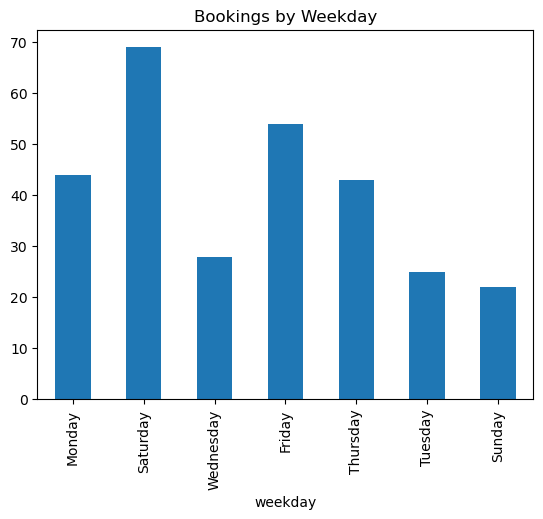

In [176]:
df['month']=df['check__in_date'].dt.month
df['weekday']=df['check__in_date'].dt.day_name()

df['month'].value_counts().sort_index().plot(kind='bar',title='Booking per Month')
df['weekday'].value_counts().plot(kind='bar',title='Bookings by Weekday')

<Axes: title={'center': 'Checkouts by Weekday'}, xlabel='weekday'>

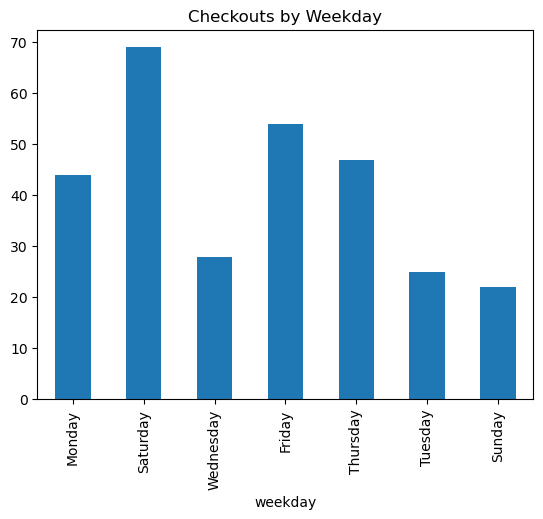

In [177]:
df['month']=df['check_out_date'].dt.month
df['weekday']=df['check__in_date'].dt.day_name()

df['month'].value_counts().sort_index().plot(kind='bar',title='Checkouts per Month')
df['weekday'].value_counts().plot(kind='bar',title='Checkouts by Weekday')

<Axes: title={'center': 'Bookings per Month'}, xlabel='check__in_date'>

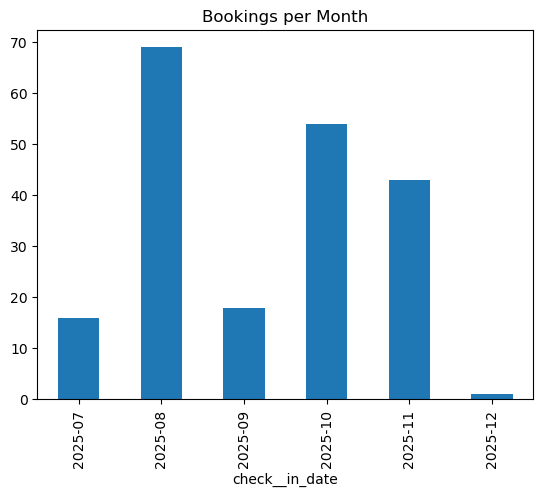

In [178]:
monthly_bookings=df.groupby(df['check__in_date'].dt.to_period('M')).size()
monthly_bookings.plot(kind='bar',title='Bookings per Month')

<Axes: title={'center': 'Daily Occupancy Rate'}, xlabel='check__in_date'>

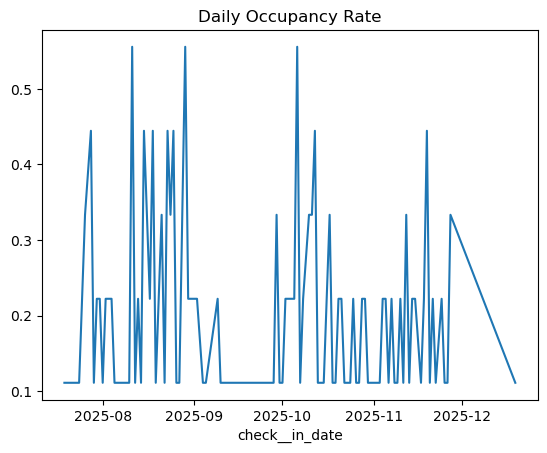

In [179]:
daily_occupancy=df.groupby(df['check__in_date'].dt.date)['room_no'].nunique()
occupancy_rate=daily_occupancy/9
occupancy_rate.plot(kind='line',title='Daily Occupancy Rate')

<Axes: title={'center': 'Seasonal Peaks(Monthly Avg Occupancy)'}, xlabel='check__in_date'>

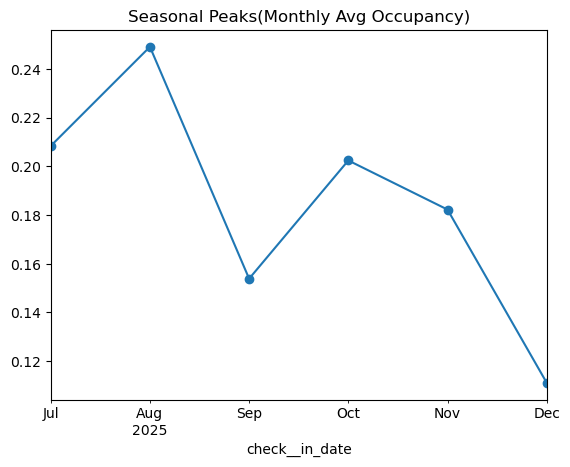

In [180]:
monthly_occupancy=occupancy_rate.groupby(pd.to_datetime(occupancy_rate.index).to_period('M')).mean()
monthly_occupancy.plot(kind='line',marker='o',title='Seasonal Peaks(Monthly Avg Occupancy)')

advance_payment    4122.283582
rest_payment       1344.094527
dtype: float64

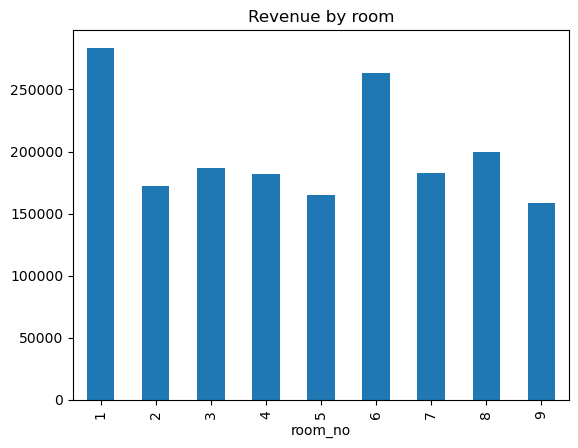

In [181]:
df.groupby('room_no')['total_amount'].sum().plot(kind='bar',title='Revenue by room')
df[['advance_payment','rest_payment']].mean()

In [182]:
repeat_customers=df['customer_name'].value_counts()
print(repeat_customers[repeat_customers>1])

customer_name
RENJITH                3
SURENDRAN NAIR         3
SABRAJ MOHAMMED        2
KUMARESAN              2
LITTY JOSE             2
AKHIL                  2
MOHAMED NADEEM         2
NISHAD PR              2
UNNIKRISHNAN           2
NITHIN                 2
ALI ZAHIR              2
RENIN MOHANAN          2
DR. JOSEPH             2
MHD FARAZUDDIN         2
NASSER HAMDAN          2
SANO ZACHARIA          2
APPI ZIYAD IBRAHIM     2
SETHU                  2
THAREEQ                2
JAMIL MHD TAHER        2
RINU REJI              2
ADIL SHIBU             2
ADITH                  2
ABDUL WAHID            2
ABDUL SALAM HUSSAIN    2
PROMOD                 2
Name: count, dtype: int64


In [183]:
df.head()

,customer_name,address,check__in_date,check_out_date,room_no,no_of_guest,price_per_day,total_amount,advance_payment,rest_payment,closing_payment,invoice_number,stay_duration,discount,month,weekday
0,LITTY JOSE,THALASSERY,2025-07-28,2025-07-29,9,2,3750,3750,500,0,3250,343/2025,1,0,7,Monday
1,ELDHOSE YACOB,NELLIKUZHI,2025-07-19,2025-07-21,8,2,2770,5540,2770,0,2770,344/2025,2,0,7,Saturday
2,JANCY,TRIVANDRUM,2025-08-03,2025-08-04,8,4,2800,2800,2800,0,0,345/2025,1,0,8,Sunday
3,YASHESH PATEL,unknown,2025-07-21,2025-07-23,8,3,2800,5600,2800,0,2500,346/2025,2,300,7,Monday
4,c/o sud Dr. Jeffrey,unknown,2025-07-26,2025-07-28,5,2,2500,5000,5000,0,0,347/2025,2,0,7,Saturday


In [184]:
df=df.drop(columns=["rest_payment"])

In [185]:
df['payment_completion']=df['advance_payment']+df['closing_payment']

In [186]:
df.head()

,customer_name,address,check__in_date,check_out_date,room_no,no_of_guest,price_per_day,total_amount,advance_payment,closing_payment,invoice_number,stay_duration,discount,month,weekday,payment_completion
0,LITTY JOSE,THALASSERY,2025-07-28,2025-07-29,9,2,3750,3750,500,3250,343/2025,1,0,7,Monday,3750
1,ELDHOSE YACOB,NELLIKUZHI,2025-07-19,2025-07-21,8,2,2770,5540,2770,2770,344/2025,2,0,7,Saturday,5540
2,JANCY,TRIVANDRUM,2025-08-03,2025-08-04,8,4,2800,2800,2800,0,345/2025,1,0,8,Sunday,2800
3,YASHESH PATEL,unknown,2025-07-21,2025-07-23,8,3,2800,5600,2800,2500,346/2025,2,300,7,Monday,5300
4,c/o sud Dr. Jeffrey,unknown,2025-07-26,2025-07-28,5,2,2500,5000,5000,0,347/2025,2,0,7,Saturday,5000


<Axes: >

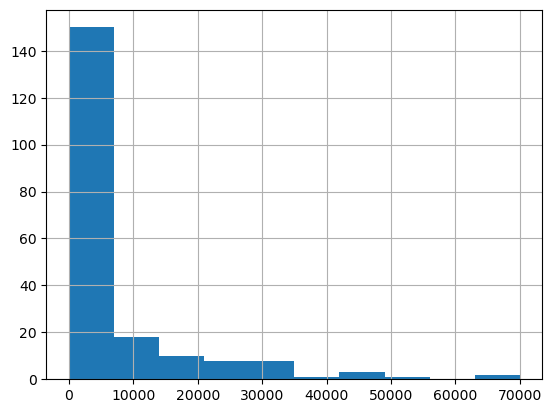

In [187]:
df['payment_completion'].hist(bins=10)

In [188]:
df.groupby('room_no')['total_amount'].sum().sort_values(ascending=False)

room_no
1    283524
6    263314
8    199836
3    186968
7    182735
4    182043
2    172565
5    165387
9    158750
Name: total_amount, dtype: int64

In [189]:
df.groupby('no_of_guest')['total_amount'].sum().sort_values(ascending=False)

no_of_guest
3    548941
2    529954
4    474052
1    155800
5     73725
6      8900
7      3750
Name: total_amount, dtype: int64

In [190]:
df.groupby('stay_duration')['total_amount'].sum().sort_values(ascending=False)

stay_duration
1     242054
2     197202
7     191940
5     131750
9     105950
14     95200
3      82000
13     80600
16     72000
8      71400
30     70000
6      61800
36     59976
4      54700
17     54400
11     50600
10     49500
15     48000
25     31250
12     30000
0      14800
Name: total_amount, dtype: int64

In [191]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features=df[['stay_duration','advance_payment','total_amount']]

scaler=StandardScaler()
X_scaled=scaler.fit_transform(features)

kmeans=KMeans(n_clusters=3,random_state=42)
df['customer_segment']=kmeans.fit_predict(X_scaled)

print(df[['customer_name','customer_segment']].head())

         customer_name  customer_segment
0           LITTY JOSE                 0
1        ELDHOSE YACOB                 0
2                JANCY                 0
3        YASHESH PATEL                 0
4  c/o sud Dr. Jeffrey                 0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


10:57:52 - cmdstanpy - INFO - Chain [1] start processing
10:57:53 - cmdstanpy - INFO - Chain [1] done processing


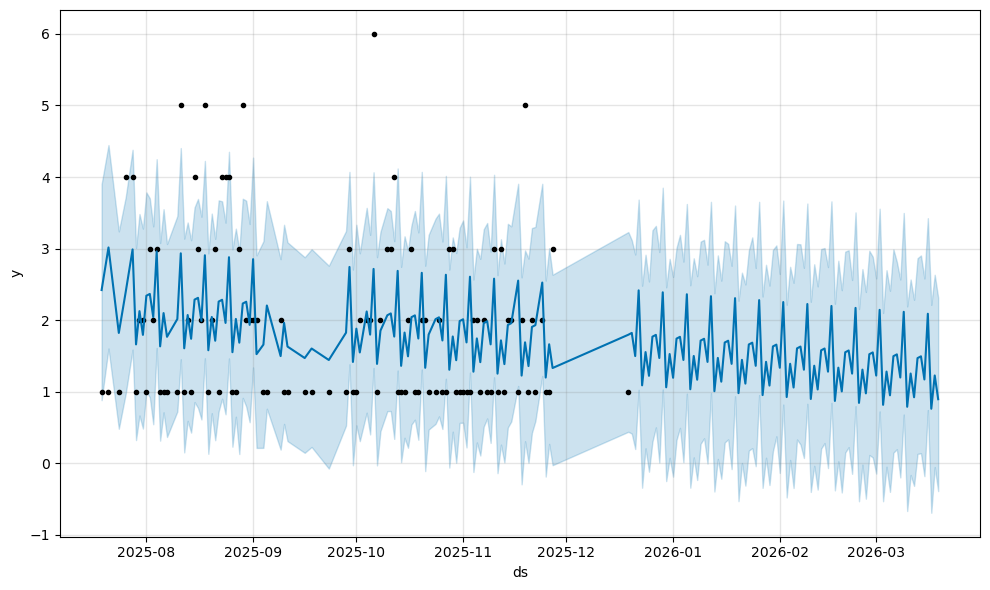

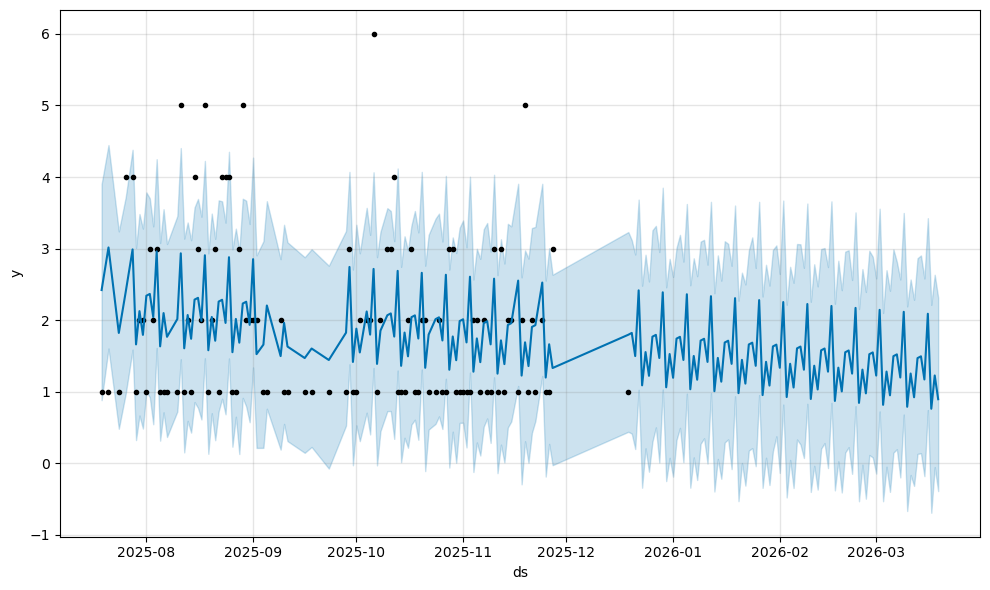

In [192]:
from prophet import Prophet

daily_bookings=df.groupby(df['check__in_date'].dt.date).size().reset_index(name='bookings')
daily_bookings.columns=['ds','y']

model=Prophet()
model.fit(daily_bookings)

future=model.make_future_dataframe(periods=90)
forecast=model.predict(future)

model.plot(forecast)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 293
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_name       201 non-null    object        
 1   address             201 non-null    object        
 2   check__in_date      201 non-null    datetime64[ns]
 3   check_out_date      201 non-null    datetime64[ns]
 4   room_no             201 non-null    int64         
 5   no_of_guest         201 non-null    int64         
 6   price_per_day       201 non-null    int64         
 7   total_amount        201 non-null    int64         
 8   advance_payment     201 non-null    int64         
 9   closing_payment     201 non-null    int64         
 10  invoice_number      201 non-null    object        
 11  stay_duration       201 non-null    int64         
 12  discount            201 non-null    int64         
 13  month               201 non-null    int32         
 14 

In [194]:
from sklearn.linear_model import LinearRegression

X=df[['price_per_day','no_of_guest','stay_duration']].fillna(0)
y=df['total_amount'].fillna(0)

model=LinearRegression()
model.fit(X,y)

print("Coefficients: ",model.coef_)
print("Intercept: ",model.intercept_)

Coefficients:  [8.91541437e-01 4.97375611e+02 2.16531219e+03]
Intercept:  -2518.9843692057184


In [195]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

df['default_flag']=(df['discount']>0).astype(int)

X=df[['advance_payment','total_amount','stay_duration','no_of_guest']].fillna(0)
y=df[['default_flag']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

clf=RandomForestClassifier(random_state=42)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       0.64      0.69      0.67        26
           1       0.38      0.33      0.36        15

    accuracy                           0.56        41
   macro avg       0.51      0.51      0.51        41
weighted avg       0.55      0.56      0.55        41



In [196]:
clv=df.groupby('customer_name')['total_amount'].sum().sort_values(ascending=False)
print(clv.head(10))

customer_name
SABRAJ MOHAMMED         129976
MOHAMED IBRAHIM          54400
YOUSOUF                  48100
C/O SUDEEP MHD AKRAM     48000
DR. JOSEPH               47000
PROMOD                   42750
DR. UMA                  40000
ADITH                    39750
NISHAD PR                33400
ABDULLAH HAMDHOON        32500
Name: total_amount, dtype: int64


In [197]:
df.head()

,customer_name,address,check__in_date,check_out_date,room_no,no_of_guest,price_per_day,total_amount,advance_payment,closing_payment,invoice_number,stay_duration,discount,month,weekday,payment_completion,customer_segment,default_flag
0,LITTY JOSE,THALASSERY,2025-07-28,2025-07-29,9,2,3750,3750,500,3250,343/2025,1,0,7,Monday,3750,0,0
1,ELDHOSE YACOB,NELLIKUZHI,2025-07-19,2025-07-21,8,2,2770,5540,2770,2770,344/2025,2,0,7,Saturday,5540,0,0
2,JANCY,TRIVANDRUM,2025-08-03,2025-08-04,8,4,2800,2800,2800,0,345/2025,1,0,8,Sunday,2800,0,0
3,YASHESH PATEL,unknown,2025-07-21,2025-07-23,8,3,2800,5600,2800,2500,346/2025,2,300,7,Monday,5300,0,1
4,c/o sud Dr. Jeffrey,unknown,2025-07-26,2025-07-28,5,2,2500,5000,5000,0,347/2025,2,0,7,Saturday,5000,0,0


In [198]:
customer_history=df.groupby("customer_name")["room_no"].value_counts().idxmax()
print("Recommended Room: ",customer_history)

Recommended Room:  ('ADIL SHIBU', np.int64(9))


In [199]:
clv=df.groupby("customer_name").apply(
    lambda x: (x["payment_completion"].mean()*
              x["invoice_number"].count()/x["check__in_date"].nunique()*
              3)
)
print(clv.head())

customer_name
 C/O SUDEEP SHIYAH     90000.0
 HAMED AL RAMADHANI    48300.0
A. Rahul               51300.0
ABDUL SALAM HUSSAIN    52105.5
ABDUL WAHID                0.0
dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13896\62314917.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  clv=df.groupby("customer_name").apply(


In [200]:
df.head()

,customer_name,address,check__in_date,check_out_date,room_no,no_of_guest,price_per_day,total_amount,advance_payment,closing_payment,invoice_number,stay_duration,discount,month,weekday,payment_completion,customer_segment,default_flag
0,LITTY JOSE,THALASSERY,2025-07-28,2025-07-29,9,2,3750,3750,500,3250,343/2025,1,0,7,Monday,3750,0,0
1,ELDHOSE YACOB,NELLIKUZHI,2025-07-19,2025-07-21,8,2,2770,5540,2770,2770,344/2025,2,0,7,Saturday,5540,0,0
2,JANCY,TRIVANDRUM,2025-08-03,2025-08-04,8,4,2800,2800,2800,0,345/2025,1,0,8,Sunday,2800,0,0
3,YASHESH PATEL,unknown,2025-07-21,2025-07-23,8,3,2800,5600,2800,2500,346/2025,2,300,7,Monday,5300,0,1
4,c/o sud Dr. Jeffrey,unknown,2025-07-26,2025-07-28,5,2,2500,5000,5000,0,347/2025,2,0,7,Saturday,5000,0,0


In [201]:
df["check__in_date"] = pd.to_datetime(df["check__in_date"])
df["check_in_days"] = (df["check__in_date"] - pd.Timestamp("1970-01-01")) // pd.Timedelta("1D")
df["check_in_dow"] = df["check__in_date"].dt.dayofweek

In [202]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination=0.01)
features = df[["check_in_days", "discount", "advance_payment"]]
df["fraud_flag"] = model.fit_predict(features)
suspicious = df[df["fraud_flag"] == -1]
print(suspicious)

           customer_name  address check__in_date check_out_date  room_no  \
13       SABRAJ MOHAMMED  ANDAMAN     2025-08-01     2025-08-31        4   
156  ABDUL SALAM HUSSAIN  unknown     2025-10-02     2025-10-09        7   

     no_of_guest  price_per_day  total_amount  advance_payment  \
13             3           2500         70000            50000   
156            2           2200         15400            15400   

     closing_payment  ... stay_duration  discount  month   weekday  \
13             20000  ...            30         0      8    Friday   
156            15400  ...             7    -15400     10  Thursday   

    payment_completion  customer_segment  default_flag  check_in_days  \
13               70000                 2             0          20301   
156              30800                 0             0          20363   

     check_in_dow  fraud_flag  
13              4          -1  
156             3          -1  

[2 rows x 21 columns]
